In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Henon Map

In [2]:
def henon(x,y,a = 1.3, b = 0.3):
    return np.array([y + 1 - a*x**2 , b*x],dtype = np.float64)

def henonFixedPoint(x0,y0,a = 1.3,b = 0.3, error = 1e-6,nmax = 1000):
    for _ in range(int(nmax)):
        x_,y_ = henon(x0,y0,a,b)
        if(np.sqrt((x_ - x0)**2 - (y_ - y0)**2) < error):
            return (x_,y_), True
        x0,y0 = x_,y_
    return (x_,y_), False

def henonList(X0 : np.array ,Y0 : np.array, nmax, a = 1.3,b = 0.3):
    if(X0.shape != Y0.shape):
        return ValueError
    nmax = int(nmax)
    
    #shape -> Point Number, Interation Number, XY
    P = np.zeros((len(X0),nmax,2),dtype = np.float64)
    
    P[:,0,0] = X0
    P[:,0,1] = Y0

    #print(np.array(henon(P[:,0,0],P[:,0,1])).T)
    #print(P[:,1,:])
    
    for i in range(1,nmax):
        P[:,i,:] = np.array(henon(P[:,i-1,0],P[:,i-1,1])).T
        
    return P

In [3]:
a,b = 1.3,0.3
delta,res = 0.1,50

X0 = (b-1)/(2*a)
Y0 = b*X0
P0 = np.array(np.meshgrid(np.linspace(X0-delta,X0+delta,res),np.linspace(Y0-delta,Y0+delta,res)),dtype = np.float64).reshape((res**2,2))

#P = henonList(*np.array([[1,1],[0,0],[0.5,0.5],[0.25,0.25],[0.75,0.75]], dtype = np.float64).T,nmax = 1e5);
P = henonList(*P0.T,nmax = 5e3);
P.shape

(2500, 5000, 2)

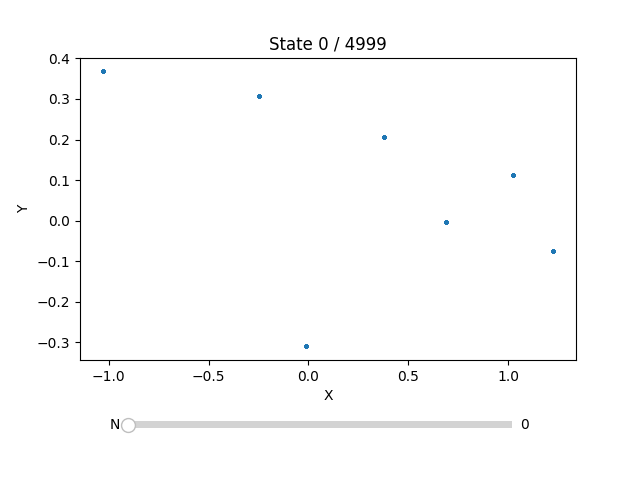

In [4]:
%matplotlib widget
#for p in P:
#    plt.scatter(*p.T,s = 2,label = p[0])
#plt.legend()
#plt.show()

N = P.shape[1]

def getAllPoints(n):
    return P[:,n,:].T

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)  # leave space for the slider

# Initial plot (collection 0)
sc = ax.scatter(*P[:,-1,:].T, s = 2)
ax.set_title(f"State 0 / {N-1}")
ax.set_xlabel("X")
ax.set_ylabel("Y")

# Set axis limits so all collections fit
#all_x = collections[..., 0].ravel()
#all_y = collections[..., 1].ravel()
#ax.set_xlim(all_x.min(), all_x.max())
#ax.set_ylim(all_y.min(), all_y.max())

# --- Slider setup -------------------------------------------------------
ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])
slider = Slider(ax_slider, 'N', 0, N - 1, valinit=0, valstep=1)

# --- Update function ----------------------------------------------------
def update(val):
    n = int(slider.val)
    sc.set_offsets(P[:,n,:].T)  # update scatter points
    ax.set_title(f"State {n} / {N-1}")
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()

In [8]:
#limits, res = 
nmax = int(1e5)

P = np.ndarray((nmax,2),dtype = np.float64)

P[0] = [1,1]

for i in range(1,nmax):
    P[i] = henon(*P[i-1])

fig = plt.figure()

plt.scatter(*P.T , s=2)

plt.show()
P.shape

KeyboardInterrupt: 